<a href="https://colab.research.google.com/github/melisamichuki01/moringa_project/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2020_05_Melisa_Michuki_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis 


---



# Defining the question

---



###1. Specifying the question 

> Figuring out how we can predict which individuals are most likely to have or use a bank account hence providing a solution which will help show an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.





###2. Defining the metric of success


> As we try to solve our research problem,we will carry out the following procedures:

> a) We will carry out univariate analysis where will plot pie charts and bar graphs to understand the data more.

>  b)We will also plot scatter plots and histograms to understand the relationship between variables during bivariate analysis.

>c) We will finish off by perform a multivariate analysis by using factor, Discriminant and Principal Component analysis

###3. Understanding the context

> Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

> Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

###4. Recording the experimental design

>We will carry out a full analysis of the data available and choose the most accurate multivariate analysis.

###5. Data relevance.

>The data provided is relevant to this study.It is suitable to carry out analysis and give the output needed

In [0]:
variable = 'http://bit.ly/VariableDefinitions'
variables = pd.read_csv(variable)
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


# Reading the data

---



In [0]:
# Loading the Data from the source
# Dataset url = http://bit.ly/FinancialDataset
#

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib

from matplotlib import pyplot as plt

In [0]:
# Loading the Data from the source 
# Dataset Files avai:
# Variable Definitions: http://bit.ly/VariableDefinitions 
# Dataset: http://bit.ly/FinancialDataset
# 
# 
df = pd.read_csv('http://bit.ly/FinancialDataset')
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# Checking the data


---



In [0]:
# Checking the no of records in the dataset available
#
df.shape

(23524, 13)

In [0]:
# Previewing the top of our dataset
#
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# Previewing the bottom of our dataset
#
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [0]:
# Checking the data type for each column
#
df.dtypes


country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

# Tidying the data

---



In [0]:
# Checking for null values
#
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [0]:
# Dropping null values
# 
df_clean = df.dropna()

In [0]:
# Checking if there are any null values
#
df_clean.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [0]:
# Check for duplicates
#
df_clean.duplicated().any()

False

In [0]:
# Rename some of the columns
#
Df = df_clean.rename(columns={'The relathip with head':'Relationship_with_head','Respondent Age':'Age'})
Df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Age,gender_of_respondent,Relationship_with_head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# Drop irrelevant columns
#
Df = Df.drop(['uniqueid'],axis=1)
Df.head(2)

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Age,gender_of_respondent,Relationship_with_head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


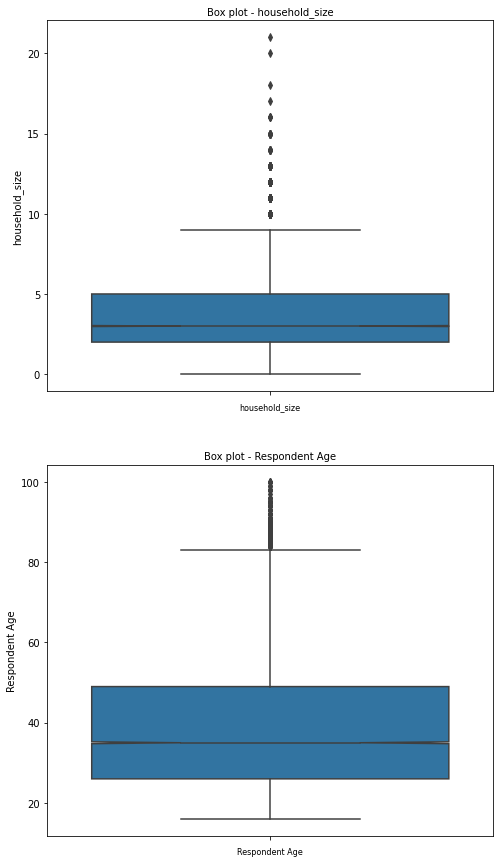

In [0]:
# Check for Outliers
#
col_names = ['household_size', 'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(8,15))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=df[col_val], notch=True, ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [0]:
# Check for anomalies
#
lower = Df.quantile(.25)
upper= Df.quantile(.75)

iqr =upper - lower
print(iqr)

year               2.0
household_size     3.0
Age               23.0
dtype: float64


# Analysis

---



---



## Univariate analysis

---



### Central Tendencies

In [0]:
# Summary of the columns with integer datatype provided in the dataset available
# with the measures of central tendency
Df.describe()

,year,household_size,Age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [0]:
# Mode 
print('households size mode',Df['household_size'].mode())
print('Age mode',Df['Age'].mode())

households size mode 0    2.0
dtype: float64
Age mode 0    30.0
dtype: float64


In [0]:
# Showing the mode for each column
Df_mode =Df[['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Age',
       'gender_of_respondent', 'Relationship_with_head', 'marital_status',
       'Level of Educuation', 'Type of Job']].mode()
Df_mode.T

,0
country,Rwanda
year,2016
Has a Bank account,No
Type of Location,Rural
Cell Phone Access,Yes
household_size,2
Age,30
gender_of_respondent,Female
Relationship_with_head,Head of Household
marital_status,Married/Living together


###Data visualization

#### Pie charts

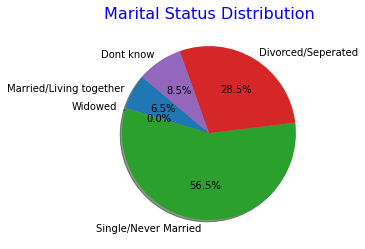

In [0]:
# plot of marital status of respondents
#
size = Df.groupby(['marital_status'])['household_size'].sum()
status = ['Married/Living together', 'Widowed', 'Single/Never Married', 
          'Divorced/Seperated', 'Dont know']
plt.pie(size, labels = status, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.title('Marital Status Distribution',color='blue', size = 16)
plt.show()

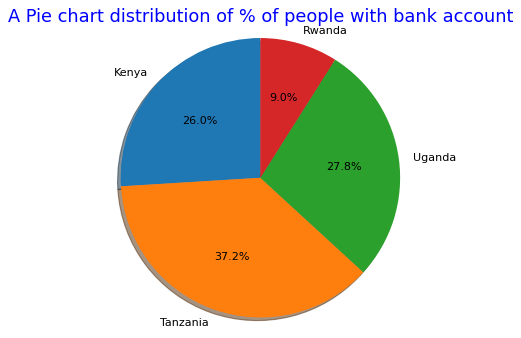

In [0]:
# Plot of respondents with bank accounts with respect to their country of origin

bank =Df.groupby(['country'])['Has a Bank account'].count()
label = ['Kenya','Tanzania','Uganda','Rwanda']
label

plt.figure(figsize=(5,5),dpi=80)
plt.pie(bank, labels = label, autopct= '%1.1f%%', shadow= True,  startangle= 90)
plt.axis('equal')
plt.title('A Pie chart distribution of % of people with bank account', color='blue', size = 16)
plt.show()

In [0]:
# Plot of respondents with a bank account with respect to gender
gender = Df.groupby(['gender_of_respondent'])['Has a Bank account'].count()
status = ['Female','Male']
plt.figure(dpi = 120)
plt.pie(size, labels = status, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.title('Respondents with a bank account with respect to gender',color= 'blue',size=16)
plt.show()

#### Bar charts

In [0]:
# Plot of the level of education of respondents
#
Df['Level of Educuation'].value_counts().plot.bar(title='Level ofEducation \n')

In [0]:
# Plot of source of income
#
Df['Type of Job'].value_counts().plot.bar(title='Source of income \n')


#### Frequency distribution

In [0]:
col_names = ['household_size', 'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(8,10))

for i, col_val in enumerate(col_names):
  sns.distplot(df[col_val], hist=True, ax=ax[i], color='blue')
  ax[i].set_title('Frequency Dist' + col_val, color='black',fontsize=16,)
  ax[i].set_xlabel(col_val, fontsize=8)
  ax[i].set_ylabel(col_val, fontsize=8)

plt.show()

### Bivariate analysis

---



In [0]:
# Using pairplot,we plot the bivariate summaries 
# and recording our observations
#
#
sns.pairplot(Df)
plt.show()

In [0]:
# Using heatmap we plot the correlation
# between various variables
#
sns.heatmap(Df.corr(),annot=True)
plt.show()

### Multivariate analysis 

#### Mapping the columns

In [255]:
# Inorder to carry out multivariate analysis successfully,we convert some of the columns to integer
#
country ={"Kenya": 0,"Rwanda":1, "Tanzania": 2, "Uganda": 3}
location = {"Urban":1, "Rural":0}
cellphone = {"Yes":1, "No":0}
gender = {"Male":1, "Female":0}
bank = { "Yes": 1, "No":0}
head={ "Spouse":2, "Head of Household":1, "Other relative":0, "Child":3,"Parent":4,"Other non-relatives":5}
education={"No formal education":0, "Primary education":1, "Secondary education":2, "Vocational/Specialised training":3,
               "Tertiary education":4, "Other/Dont know/RTA":5, "6":6}
job={"Self employed":0, "Government Dependent":1, "Formally employed Private":2, "Informally employed":3, "Formally employed Government":4,
         "Farming and Fishing":5, "Remittance Dependent":6, "Other Income":7, "Dont Know/Refuse to answer":8,"No Income":9}

Df['country']=Df['country'].map(country)
df['Type of Location'] = Df['Type of Location'].map(location)
Df['Cell Phone Access'] = Df['Cell Phone Access'].map(cellphone)
Df['gender_of_respondent'] = Df['gender_of_respondent'].map(gender)
Df['Has a Bank account']=Df['Has a Bank account'].map(bank)
Df['Relationship_with_head']=Df['Relationship_with_head'].map(head)
Df['Level of Educuation']=Df['Level of Educuation'].map(education)
Df['Type of Job']=Df['Type of Job'].map(job)
Df.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Age,gender_of_respondent,Relationship_with_head,marital_status,Level of Educuation,Type of Job
0,NaN,2018,NaN,Rural,NaN,3.0,24.0,NaN,NaN,NaN,NaN,NaN
1,NaN,2018,NaN,Rural,NaN,5.0,70.0,NaN,NaN,NaN,NaN,NaN
2,NaN,2018,NaN,Urban,NaN,5.0,26.0,NaN,NaN,NaN,NaN,NaN
3,NaN,2018,NaN,Rural,NaN,5.0,34.0,NaN,NaN,NaN,NaN,NaN
4,NaN,2018,NaN,Urban,NaN,8.0,26.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,NaN,2018,NaN,Rural,NaN,4.0,48.0,NaN,NaN,NaN,NaN,NaN
23520,NaN,2018,NaN,Rural,NaN,2.0,27.0,NaN,NaN,NaN,NaN,NaN
23521,NaN,2018,NaN,Rural,NaN,5.0,27.0,NaN,NaN,NaN,NaN,NaN
23522,NaN,2018,NaN,Urban,NaN,7.0,30.0,NaN,NaN,NaN,NaN,NaN


#### Pricinpal component analysis

In [0]:
# Step 1: Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
#
X = Df.drop(columns = ['year','Has a Bank account','marital_status'])
y = Df['Has a Bank account']

In [0]:
# Step 2: Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Step 3: Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# To do this, we execute the following code:
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Step 4: Applying PCA
# It is only a matter of three lines of code to perform PCA using Python's Scikit-Learn library. 
# The PCA class is used for this purpose. PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
# Let's take a look at the following code. In the code above, we create a PCA object named pca. 
# We did not specify the number of components in the constructor. 
# Hence, all four of the features in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# Step 5: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
# It can be seen that first principal component is responsible for 72.22% variance. 
# Similarly, the second principal component causes 23.9% variance in the dataset. 
# Collectively we can say that (72.22 + 23.9) 96.21% percent of the classification information contained 
# in the feature set is captured by the first two principal components.
explained_variance

In [0]:
# Step 6: Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# Step 7: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [0]:
# Step 8: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


#### Factor analysis

In [0]:
# Drop unnecessary columns
Df.drop(columns = ['year','marital_status'])

In [258]:
#installing factor analyzer
pip install factor_analyzer==0.2.3

In [0]:
# chi_square

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(finance)
chi_square_value,p_value
# the test was significant because the p-value is 0 which tells us that the correlation matrix is not an identity matrix

In [0]:
# choosing the number of factors
# here we can only see 3-factor analyzer are greater than 1 which means we only need to consider the three factors
from factor_analyzer import  FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(Df, 10, rotation=None)

ev, v = fa.get_eigenvalues()

In [0]:
# the screen plot that drows a straight line for easch factor and its eigen values.

plt.scatter(range(1,Df.shape[1]+1),ev)
plt.plot(range(1,Df.shape[1]+1),ev)
plt.title('Screen Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()
plt.show()

In [0]:
# Performing Factor Analysis for 3
fa = FactorAnalyzer()
fa.analyze(Df,3, rotation='varimax')
fa.loadings

In [0]:
# Performing factor analysis for 2
fa = FactorAnalyzer()
fa.analyze(Df, 2, rotation="varimax")
fa.loadings

In [0]:
# Getting variance of each factors
fa.get_factor_variance()